# Health Insurance Lead Prediction

# Data Inspection and Cleaning

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [94]:
data=pd.read_csv("C:/Users/AKARSH/Pictures/Data Analytics/Datasets/Health Insurance.csv")
data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [3]:
#changing the column name
data=data.rename(columns={"Health Indicator":"Health_Indicator"})
data.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health_Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [4]:
data1=data.copy()

In [5]:
#data.Holding_Policy_Type.value_counts()

In [6]:
#finding and imputing the number of missing values in each column.
data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health_Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [7]:
data['Health_Indicator'].fillna(data['Health_Indicator'].mode()[0], inplace = True)
data['Holding_Policy_Duration'].fillna(data['Holding_Policy_Duration'].mode()[0], inplace = True)
data['Holding_Policy_Type'].fillna(data['Holding_Policy_Type'].mode()[0],inplace = True)

In [8]:
data.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health_Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [9]:
#dtype Conversion

data.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health_Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
data.City_Code=le.fit_transform(data.City_Code)
data.Accomodation_Type=le.fit_transform(data.Accomodation_Type)
data.Reco_Insurance_Type=le.fit_transform(data.Reco_Insurance_Type)
data.Is_Spouse=le.fit_transform(data.Is_Spouse)
data.Health_Indicator=le.fit_transform(data.Health_Indicator)
data.Holding_Policy_Duration=le.fit_transform(data.Holding_Policy_Duration)

In [12]:
#data.Reco_Insurance_Type.value_counts()

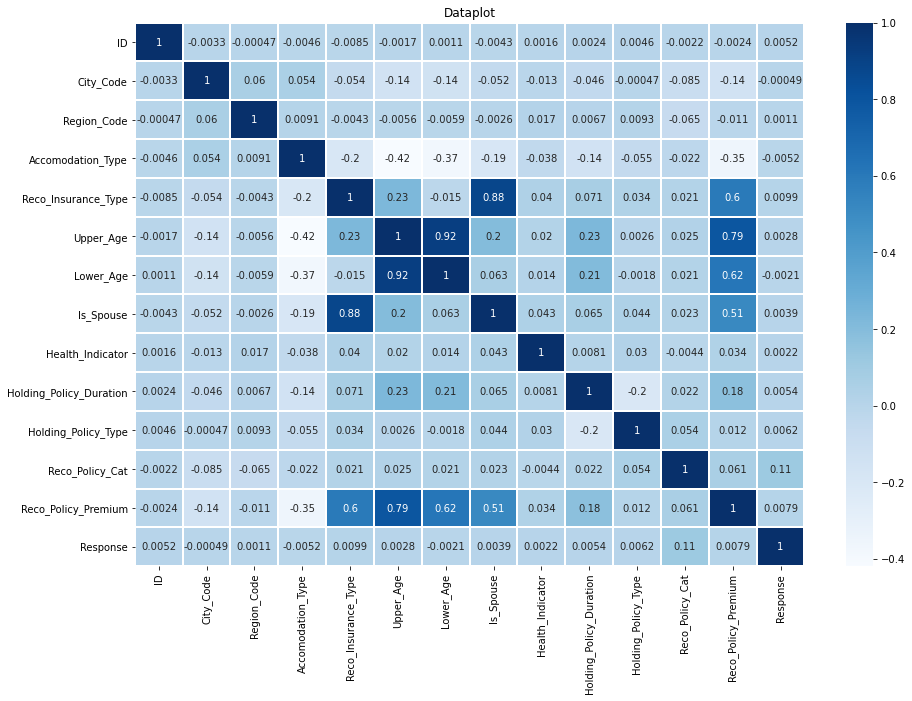

In [13]:
#correlation heatmap

data_corr=data.corr()
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(data_corr,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title('Dataplot')
plt.show()

# Model on data to check performance

In [14]:
#sampling the data

x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((35617, 13), (15265, 13), (35617,), (15265,))

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [16]:
lg_pred=lg.predict(xtest)

#Confusion matrix
m=confusion_matrix(lg_pred,ytest)
m

array([[11558,  3707],
       [    0,     0]], dtype=int64)

In [17]:
#Accuracy
lg_acc=m.diagonal().sum()/m.sum()*100
lg_acc

75.71568948575172

In [18]:
#Classification Report
print(classification_report(lg_pred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     15265
           1       0.00      0.00      0.00         0

    accuracy                           0.76     15265
   macro avg       0.50      0.38      0.43     15265
weighted avg       1.00      0.76      0.86     15265



# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [20]:
dt_pred=dt.predict(xtest)
m1=confusion_matrix(dt_pred,ytest)
m1

array([[8862, 2484],
       [2696, 1223]], dtype=int64)

In [21]:
dt_acc=m1.diagonal().sum()/m1.sum()*100
dt_acc

66.06616442843105

In [22]:
print(classification_report(dt_pred,ytest))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     11346
           1       0.33      0.31      0.32      3919

    accuracy                           0.66     15265
   macro avg       0.55      0.55      0.55     15265
weighted avg       0.65      0.66      0.66     15265



# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [24]:
rf_pred=rf.predict(xtest)
m2=confusion_matrix(rf_pred,ytest)
m2

array([[11480,  3625],
       [   78,    82]], dtype=int64)

In [25]:
rf_acc=m2.diagonal().sum()/m2.sum()*100
rf_acc

75.74189321978382

In [26]:
print(classification_report(rf_pred,ytest))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     15105
           1       0.02      0.51      0.04       160

    accuracy                           0.76     15265
   macro avg       0.51      0.64      0.45     15265
weighted avg       0.98      0.76      0.85     15265



# Ada Boost

In [27]:
from sklearn.ensemble import AdaBoostClassifier

ab=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5) #on top of DT
ab.fit(xtrain,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [28]:
ab_pred=ab.predict(xtest)
m3=confusion_matrix(ab_pred,ytest)
m3

array([[8870, 2486],
       [2688, 1221]], dtype=int64)

In [29]:
acc_ab=m3.diagonal().sum()/m3.sum()*100
acc_ab

66.10547002947919

In [30]:
print(classification_report(ab_pred,ytest))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     11356
           1       0.33      0.31      0.32      3909

    accuracy                           0.66     15265
   macro avg       0.55      0.55      0.55     15265
weighted avg       0.66      0.66      0.66     15265



# Xg Boost

In [31]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [32]:
xg_pred=xg.predict(xtest)
m_xg=confusion_matrix(xg_pred,ytest)
m_xg

array([[11302,  3498],
       [  256,   209]], dtype=int64)

In [33]:
acc_xg=m_xg.diagonal().sum()/m_xg.sum()*100
acc_xg

75.40779561087454

In [34]:
print(classification_report(xg_pred,ytest))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86     14800
           1       0.06      0.45      0.10       465

    accuracy                           0.75     15265
   macro avg       0.52      0.61      0.48     15265
weighted avg       0.95      0.75      0.83     15265



# Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

nb.fit(xtrain,ytrain)

MultinomialNB()

In [36]:
nb_pred=nb.predict(xtest)
m_nb=confusion_matrix(nb_pred,ytest)
m_nb

array([[5446, 1729],
       [6112, 1978]], dtype=int64)

In [37]:
acc_nb=m_nb.diagonal().sum()/m_nb.sum()*100
acc_nb

48.63413036357681

In [38]:
print(classification_report(nb_pred,ytest))

              precision    recall  f1-score   support

           0       0.47      0.76      0.58      7175
           1       0.53      0.24      0.34      8090

    accuracy                           0.49     15265
   macro avg       0.50      0.50      0.46     15265
weighted avg       0.50      0.49      0.45     15265



# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=40)
kn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=40)

In [40]:
kn_pred=kn.predict(xtest)

m_kn=confusion_matrix(kn_pred,ytest)
m_kn

array([[11556,  3707],
       [    2,     0]], dtype=int64)

In [41]:
acc_kn=m_kn.diagonal().sum()/m_kn.sum()*100
acc_kn

75.70258761873568

In [42]:
print(classification_report(kn_pred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     15263
           1       0.00      0.00      0.00         2

    accuracy                           0.76     15265
   macro avg       0.50      0.38      0.43     15265
weighted avg       1.00      0.76      0.86     15265



# SVM

In [43]:
#from sklearn.svm import SVC
#svc=SVC()
#svc.fit(x_train,y_train)

#svc_pred=svc.predict(x_test)
#svc_pred

#m_svc=confusion_matrix(svc_pred,y_test)
#m_svc

#acc_svc=m_svc.diagonal().sum()/m_svc.sum()*100
#acc_svc

#print(classification_report(svc_pred,y_test))

#SVM taking so much time

In [44]:
data.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

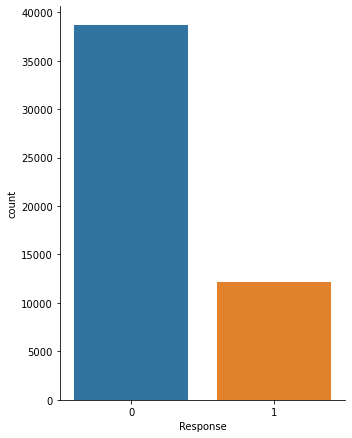

In [45]:
#plotting target column for checking class imbalance

g = sns.catplot(x="Response", 
                data=data, kind="count",
                height=6, aspect=.8)

Preliminary models were run to narrow down the selection. Selected models are LogR, XG Boost, RF, KNN There is also a class imbalance problem. So performing class imbalance techniques

# IMBlearn Oversampling

In [46]:
from imblearn.over_sampling import RandomOverSampler
m_r=RandomOverSampler(random_state=100)

imbx=data.iloc[:,:-1]
imby=data.iloc[:,-1]
imbx,imby=m_r.fit_resample(imbx,imby)
imbx.shape,imby.shape

((77346, 13), (77346,))

In [47]:
imby.value_counts()

0    38673
1    38673
Name: Response, dtype: int64

# Outlier Treatment

<AxesSubplot:>

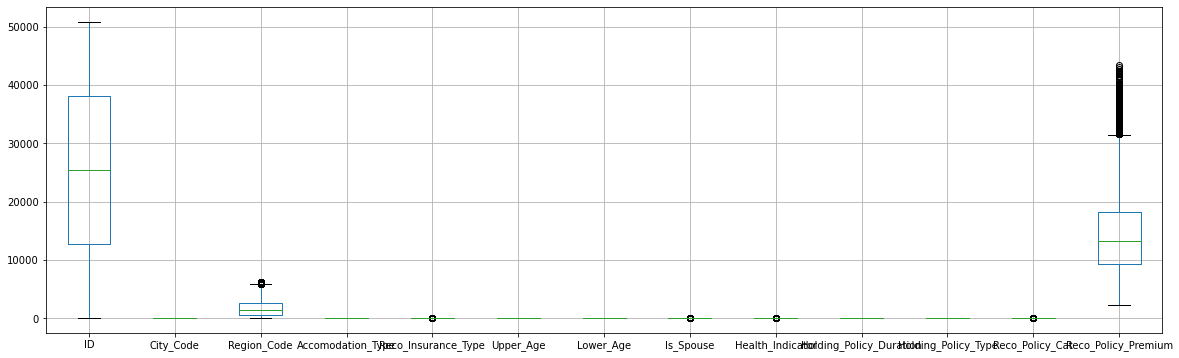

In [48]:
imbx.boxplot(figsize=(20,6))

Features 'Region_Code', 'Reco_Insurance_Type', 'Is_Spouse', 'Health_Indicator', 'Reco_Policy_Cat' and 'Reco_Policy_Premium' have outliers.

<AxesSubplot:>

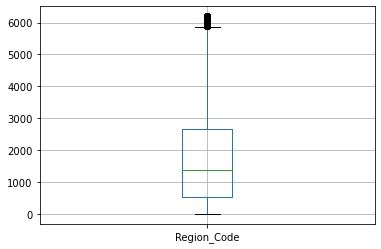

In [49]:
imbx.boxplot(column='Region_Code')

<AxesSubplot:xlabel='Region_Code', ylabel='Density'>

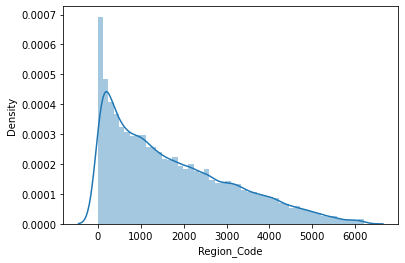

In [50]:
sns.distplot(imbx['Region_Code'])

In [51]:
imbx.Region_Code.describe()

count    77346.000000
mean      1732.925012
std       1424.943677
min          1.000000
25%        523.000000
50%       1393.000000
75%       2664.000000
max       6194.000000
Name: Region_Code, dtype: float64

In [52]:
iqr=imbx.Region_Code.quantile(0.75)-imbx.Region_Code.quantile(0.25)
u=imbx["Region_Code"].quantile(0.75)+1.5*iqr  #upper bound
l=imbx["Region_Code"].quantile(0.25)-1.5*iqr
print(u,l)

5875.5 -2688.5


In [53]:
imbx.loc[imbx["Region_Code"]>u,"Region_Code"]=u

<AxesSubplot:>

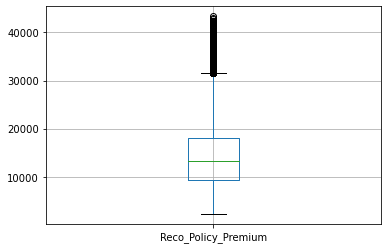

In [54]:
imbx.boxplot(column='Reco_Policy_Premium')

<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='Density'>

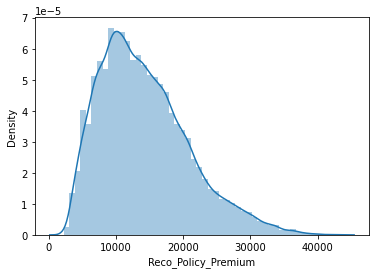

In [55]:
sns.distplot(imbx['Reco_Policy_Premium'])

In [56]:
iqr1=imbx.Reco_Policy_Premium.quantile(0.75)-imbx.Reco_Policy_Premium.quantile(0.25)
u1=imbx["Reco_Policy_Premium"].quantile(0.75)+1.5*iqr1   #upper bound
l1=imbx["Reco_Policy_Premium"].quantile(0.25)-1.5*iqr1
print(u1,l1)

31508.25 -4101.75


In [57]:
imbx.loc[imbx["Reco_Policy_Premium"]>u1,"Reco_Policy_Premium"]=u1

In [58]:
#sns.distplot(xsmote['Reco_Policy_Cat']) (categorical)

#sns.distplot(xsmote['Health_Indicator']) (categorical)

#sns.distplot(xsmote['Holding_Policy_Type']) (categorical)

In [59]:
#splitting to train and test

x_train,x_test,y_train,y_test=train_test_split(imbx,imby,test_size=0.3,random_state=100)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((54142, 13), (23204, 13), (54142,), (23204,))

# Logistic Regression

In [60]:
lg.fit(x_train,y_train)

lg_pred3=lg.predict(x_test)
lg_m2=confusion_matrix(lg_pred3,y_test)
#lg_m2

lg_acc3=lg_m2.diagonal().sum()/lg_m2.sum()*100
#lg_acc3

print(classification_report(lg_pred3,y_test))

              precision    recall  f1-score   support

           0       0.41      0.56      0.47      8488
           1       0.68      0.53      0.60     14716

    accuracy                           0.54     23204
   macro avg       0.54      0.55      0.54     23204
weighted avg       0.58      0.54      0.55     23204



# Decision Tree

In [61]:
dt.fit(x_train,y_train)

dt_pred3=dt.predict(x_test)

dt_m2=confusion_matrix(dt_pred3,y_test)
#dt_m2

dt_acc2=dt_m2.diagonal().sum()/dt_m2.sum()*100
#dt_acc2

print(classification_report(dt_pred3,y_test))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81      9354
           1       0.92      0.77      0.84     13850

    accuracy                           0.83     23204
   macro avg       0.83      0.84      0.82     23204
weighted avg       0.85      0.83      0.83     23204



# XG Boost

In [62]:
xg.fit(x_train,y_train)

xg_pred3=xg.predict(x_test)
xg_m2=confusion_matrix(xg_pred3,y_test)
#xg_m2

xg_acc3=xg_m2.diagonal().sum()/xg_m2.sum()*100
#xg_acc3

print(classification_report(xg_pred3,y_test))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68      9984
           1       0.77      0.67      0.72     13220

    accuracy                           0.70     23204
   macro avg       0.70      0.70      0.70     23204
weighted avg       0.71      0.70      0.70     23204



# Ada Boost

In [63]:
ab.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [64]:
ab_pred3=ab.predict(x_test)
ab_m2=confusion_matrix(ab_pred3,y_test)
ab_m2

array([[ 8475,   896],
       [ 3171, 10662]], dtype=int64)

In [65]:
acc_ab3=ab_m2.diagonal().sum()/ab_m2.sum()*100
#acc_ab2

print(classification_report(ab_pred3,y_test))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81      9371
           1       0.92      0.77      0.84     13833

    accuracy                           0.82     23204
   macro avg       0.83      0.84      0.82     23204
weighted avg       0.84      0.82      0.83     23204



# Naive Bayes

In [66]:
nb.fit(x_train,y_train)

nb_pred3=nb.predict(x_test)
nb_m2=confusion_matrix(nb_pred3,y_test)
#nb_m2

acc_nb3=nb_m2.diagonal().sum()/nb_m2.sum()*100
#acc_nb3

print(classification_report(nb_pred3,y_test))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51     11768
           1       0.50      0.50      0.50     11436

    accuracy                           0.50     23204
   macro avg       0.50      0.50      0.50     23204
weighted avg       0.50      0.50      0.50     23204



# KNN

In [67]:
kn.fit(x_train,y_train)

kn_pred3=kn.predict(x_test)
kn_m2=confusion_matrix(kn_pred3,y_test)
#kn_m2

acc_kn3=kn_m2.diagonal().sum()/kn_m2.sum()*100
#acc_kn3

print(classification_report(kn_pred3,y_test))

              precision    recall  f1-score   support

           0       0.55      0.54      0.55     11864
           1       0.53      0.54      0.54     11340

    accuracy                           0.54     23204
   macro avg       0.54      0.54      0.54     23204
weighted avg       0.54      0.54      0.54     23204



# Random Forest

In [68]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
rf_pred3=rf.predict(x_test)
rf_m2=confusion_matrix(rf_pred3,y_test)
rf_m2

array([[10673,  1168],
       [  973, 10390]], dtype=int64)

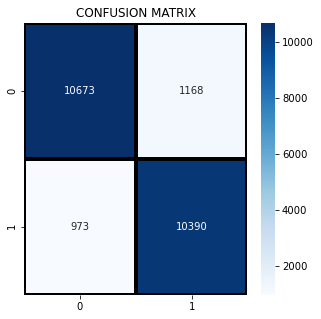

In [70]:
plt.figure(figsize=(5,5))
sns.heatmap(rf_m2,annot=True,fmt = "d",linecolor="k",cmap=plt.cm.Blues,linewidths=3)
    
plt.title("CONFUSION MATRIX",fontsize=12)
plt.show()

In [71]:
rf_acc3=rf_m2.diagonal().sum()/rf_m2.sum()*100
rf_acc3

90.77314256162731

In [72]:
print(classification_report(rf_pred3,y_test))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11841
           1       0.90      0.91      0.91     11363

    accuracy                           0.91     23204
   macro avg       0.91      0.91      0.91     23204
weighted avg       0.91      0.91      0.91     23204



RF is best fitted model with 90% Accuracy.Also F1-Score is 0.91 for both classes which is better.

# AUCROC Curve for RF

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_rf=roc_auc_score(rf_pred3,y_test)
roc_rf

0.90786544362336

In [74]:
pred_valuerf=rf.predict_proba(x_test)
df_rocrf=pd.DataFrame(pred_valuerf)
df_rocrf

,0,1
0,0.59,0.41
1,0.71,0.29
2,0.64,0.36
3,0.83,0.17
4,0.93,0.07
...,...,...
23199,0.00,1.00
23200,0.08,0.92
23201,0.26,0.74
23202,0.77,0.23


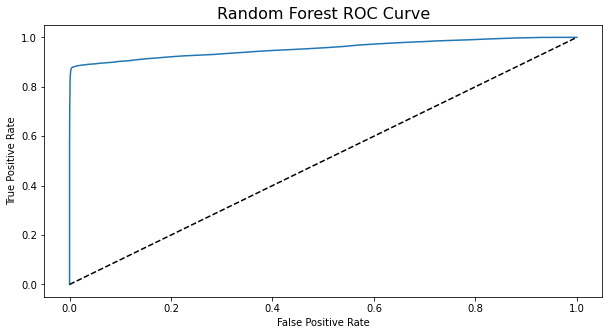

In [75]:
fpr_rf,tpr_rf,threshold_rf=roc_curve(y_test,df_rocrf.iloc[:,1])
plt.subplots(figsize=(10,5))
plt.plot(fpr_rf,tpr_rf)
plt.plot([0, 1], [0, 1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [76]:
res=pd.DataFrame(rf_pred3,columns=["Response"])
res

,Response
0,0
1,0
2,0
3,0
4,0
...,...
23199,1
23200,1
23201,1
23202,0


In [77]:
Id=pd.DataFrame(x_test['ID'].astype(int))
Id=Id.reset_index(drop=True)
Id

,ID
0,49321
1,37115
2,46432
3,6547
4,37451
...,...
23199,39863
23200,47446
23201,28452
23202,33092


In [78]:
result=pd.concat([Id,res],axis=1)
result

,ID,Response
0,49321,0
1,37115,0
2,46432,0
3,6547,0
4,37451,0
...,...,...
23199,39863,1
23200,47446,1
23201,28452,1
23202,33092,0


In [79]:
result.to_csv("C:/Users/AKARSH/Pictures/Data Analytics/Project/Result.csv",index=False)

 RF is best fitted model with 90% accuracy

# Feature Selection

The unique 'ID' and 'Region Code' columns will be dropped in order to simplify the data. 'Region Code' consists of far too many categorical values which would need to be one hot encoded. The feature is dropped as the data still retains the 'City Code' feature to capture some level of geographical distinction. In addition, the upper and lower age features will be dropped being represented by average age.

In [80]:
x1=data.iloc[:,1:-1]
y1=data.iloc[:,-1]



xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x1,y1,test_size = .3,random_state = 100)
xtrain1.shape,xtest1.shape,ytrain1.shape,ytest1.shape

((35617, 12), (15265, 12), (35617,), (15265,))

In [81]:
dt.fit(xtrain1,ytrain1)
dt.feature_importances_

array([0.10129249, 0.24258726, 0.01947523, 0.00681848, 0.09739151,
       0.10154692, 0.00950106, 0.0619717 , 0.06986463, 0.02090043,
       0.0511864 , 0.21746388])

In [82]:
df2 = pd.DataFrame({"feature_important":list(dt.feature_importances_),"columns":list(xtrain1.columns)})
df2

,feature_important,columns
0,0.101292,City_Code
1,0.242587,Region_Code
2,0.019475,Accomodation_Type
3,0.006818,Reco_Insurance_Type
4,0.097392,Upper_Age
5,0.101547,Lower_Age
6,0.009501,Is_Spouse
7,0.061972,Health_Indicator
8,0.069865,Holding_Policy_Duration
9,0.020900,Holding_Policy_Type


<BarContainer object of 12 artists>

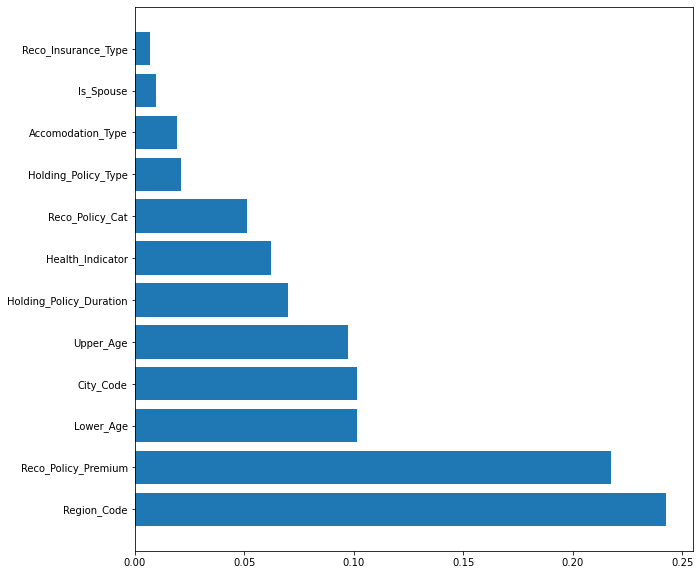

In [83]:
fig, ax = plt.subplots(figsize =(10,10))
df_feature = df2.sort_values(by='feature_important',ascending=False)
plt.barh('columns','feature_important',data=df_feature)

'Region Code' consists of far too many categorical values which would need to be one hot encoded.So the feature is not using as the data still retains the 'City Code' feature to capture some level of geographical distinction.

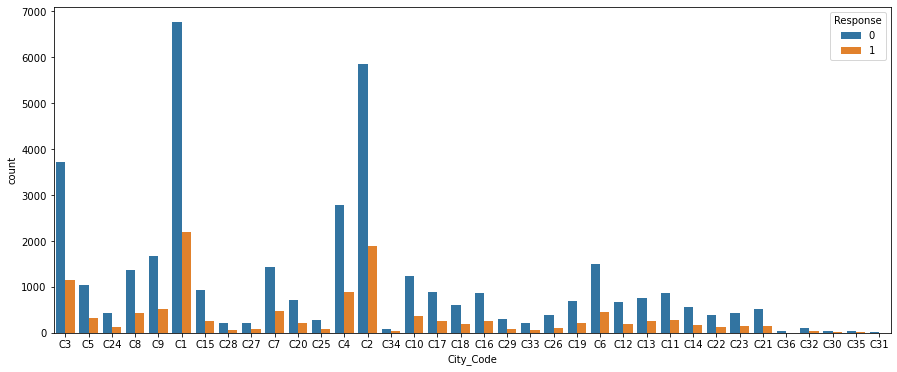

In [84]:
data1['City_Code']=data1['City_Code']
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data=data1,x='City_Code',hue='Response');

In [85]:
data.Reco_Policy_Premium.value_counts()

10080.0    61
11880.0    59
12060.0    58
9296.0     56
11520.0    54
           ..
30195.2     1
26244.0     1
18892.8     1
34792.8     1
9458.4      1
Name: Reco_Policy_Premium, Length: 6977, dtype: int64

In [86]:
# Binning Reco_Policy_Premium for Visualizations
data1['Premium(bin)'] = data1['Reco_Policy_Premium'].apply(lambda x: '0-9999' if x < 10000
                                                     else '10000-14999' if x < 15000 
                                                     else '15000-19999' if x < 20000 
                                                     else '20000-24999' if x < 25000 
                                                     else '25000-29999' if x < 30000 
                                                     else '30000+')

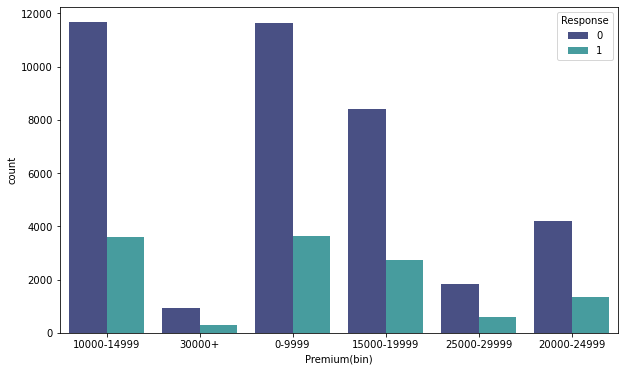

In [87]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data1,x='Premium(bin)',hue='Response',palette='mako');

Target Clients with premium between 0-19,999

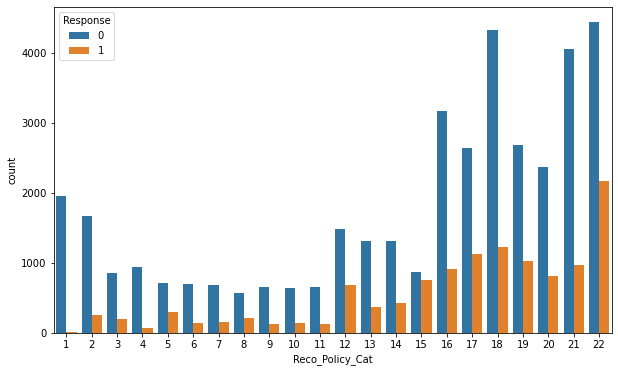

In [88]:
data['Reco_Policy_Cat']=data['Reco_Policy_Cat'].astype(int)
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data,x='Reco_Policy_Cat',hue='Response');

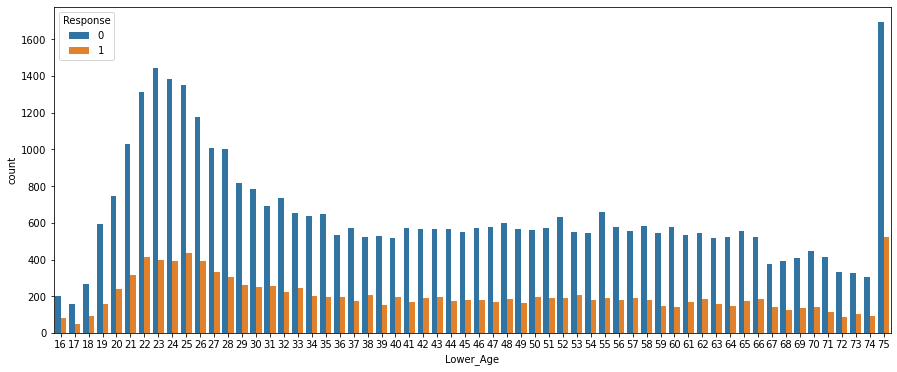

In [89]:
data['Lower_Age']=data['Lower_Age'].astype(int)
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data=data,x='Lower_Age',hue='Response');

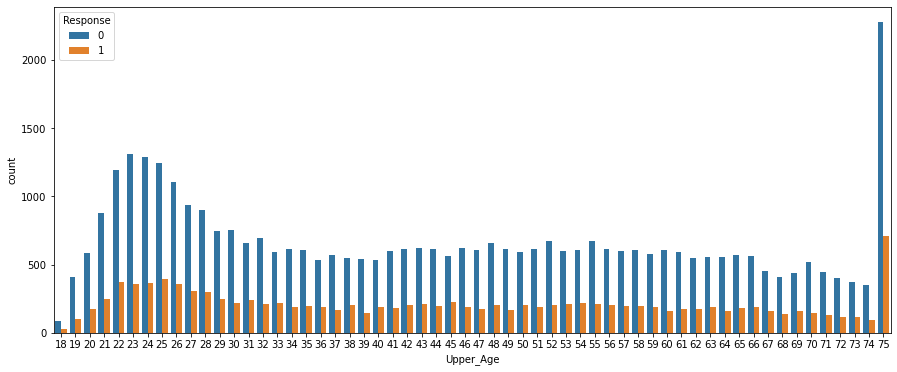

In [90]:
data['Upper_Age']=data['Upper_Age'].astype(int)
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data=data,x='Upper_Age',hue='Response');